<a href="https://colab.research.google.com/github/coder-2011/MLProjects/blob/main/TVSalesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd



Index(['tv', 'online', 'newspaper', 'sales'], dtype='object')


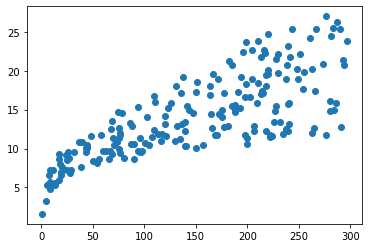

In [ ]:

data_url = "https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/Advertising.csv"
data = pd.read_csv(data_url)
print(data.columns)
plt.scatter(data["tv"], data["sales"])

x_data = torch.tensor(data["tv"], dtype=torch.float) #TV numbers
y_data = torch.tensor(data["sales"], dtype=torch.float) # Sales

In [ ]:
class LinearRegression(torch.nn.Module):
  def __init__(self):
      super().__init__()
      self.m = torch.randn(1, requires_grad=True)
      self.b = torch.randn(1, requires_grad=True)

  def forward(self, x):
      return self.m * x + self.b

model = LinearRegression()

In [ ]:
print(x_data[:5])
print(model(x_data[:5]))
print(y_data[:5])

tensor([230.1000,  44.5000,  17.2000, 151.5000, 180.8000])
tensor([-90.4946, -17.2723,  -6.5020, -59.4856, -71.0449],
       grad_fn=<AddBackward0>)
tensor([22.1000, 10.4000,  9.3000, 18.5000, 12.9000])


In [ ]:
def lossfn(y_predictions, y_true):

  return (y_predictions-y_true).pow(2).sum()

lossfn(model(x_data[:5]), y_data[:5])

tensor(26821.5156, grad_fn=<SumBackward0>)

In [ ]:
optimizer = torch.optim.Adam([model.m, model.b], lr=0.01)

epoch: 0, current loss: 2198.82568359375
epoch: 100, current loss: 2179.6845703125
epoch: 200, current loss: 2163.622314453125
epoch: 300, current loss: 2150.305908203125
epoch: 400, current loss: 2139.4072265625
epoch: 500, current loss: 2130.60595703125
epoch: 600, current loss: 2123.59814453125
epoch: 700, current loss: 2118.100341796875
epoch: 800, current loss: 2113.854248046875
epoch: 900, current loss: 2110.62841796875
epoch: 1000, current loss: 2108.21923828125
epoch: 1100, current loss: 2106.45263671875
epoch: 1200, current loss: 2105.181884765625
epoch: 1300, current loss: 2104.286376953125
epoch: 1400, current loss: 2103.66796875
epoch: 1500, current loss: 2103.250244140625
epoch: 1600, current loss: 2102.9755859375
epoch: 1700, current loss: 2102.798583984375
epoch: 1800, current loss: 2102.687744140625
epoch: 1900, current loss: 2102.6201171875
epoch: 2000, current loss: 2102.580078125
epoch: 2100, current loss: 2102.55712890625
epoch: 2200, current loss: 2102.54443359375


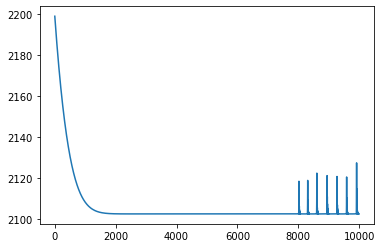

In [ ]:
loss_history = []

for i in range(10000):

  optimizer.zero_grad()

  predicted_y = model(x_data)

  current_loss = lossfn(predicted_y, y_data)

  current_loss.backward()

  optimizer.step()
  loss_history.append(current_loss.item())
  if i % 100 == 0:
    print(f'epoch: {i}, current loss: {current_loss.item()}')

plt.plot(loss_history)

In [ ]:
print(model.m, model.b)

tensor([0.0475], requires_grad=True) tensor([7.0326], requires_grad=True)
